# Digit Classification with PyTorch using MNIST 

Uncomment following code and install torchvision (if not already installed)

In [84]:
%pip install torch torchvision
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/10.6 MB 5.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.6 MB 10.3 MB/s eta 0:00:01
   ------ --------------------------------- 1.6/10.6 MB 10.5 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/10.6 MB 12.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/10.6 MB 10.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.6 MB 10.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/10.6 MB 11.5 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.6 MB 13.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.3/10.6 MB 14.5 MB/s eta 0:00:01
   ------------------------------ --------- 8.0/10.6 MB 16.6 MB/s eta 0:00:01


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from PIL import Image

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # convolutional layer
        self.conv1 = nn.Conv2d(1,6,5)
        
        # pooling
        self.pool = nn.MaxPool2d(2,2)
        
        # 2nd convolutional layer
        self.conv2 = nn.Conv2d(6,16,5)
        
        # fully connected layers
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # construct the forward network
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        
        # Apply softmax activation
        x = nn.functional.softmax(x, dim=1)  
        return x
        

### Load and Preprocess Data

In [28]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

classes = tuple(str(i) for i in range(0,10))


In [29]:
print(train_set)
print(test_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


### Display the first 10 images in the training set

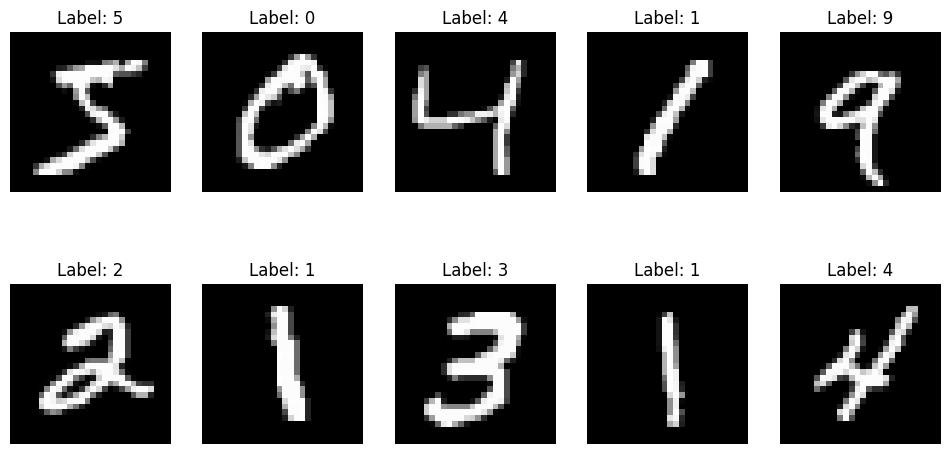

In [30]:
def show_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))
        ax.axis('off')
    plt.show()

# Get the first 10 images and labels from the training set
images, labels = [], []
for i in range(10):
    image, label = train_set[i]
    images.append(image)
    labels.append(label)

# Display the images
show_images(images, labels)

### Instantiate the Network

In [31]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

### Train Network

In [39]:
for epoch in range(5):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' % 
                  (epoch + 1, i + 1, running_loss / 1000))
            
            running_loss = 0.0




[1,  1000] loss: 1.467
[2,  1000] loss: 1.467
[3,  1000] loss: 1.466
[4,  1000] loss: 1.466
[5,  1000] loss: 1.468


In [40]:
print('---- TRAINING COMPLETE ----')

---- TRAINING COMPLETE ----


### Test the Network

In [41]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('Accuracy of the network on the test images: {:.2f}'.format(accuracy))


Accuracy of the network on the test images: 0.99


In [79]:
def display_correctly_classified(net, testloader, classes, num_samples=10):
    # Set the model to evaluation mode
    net.eval()

    with torch.no_grad():
        correctly_classified_count = 0
        for i, data in enumerate(testloader, 0):
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            softmax_probs = F.softmax(outputs, dim=1)

            for j in range(len(images)):
                if predicted[j] == labels[j]:
                    correctly_classified_count += 1
                    # Create a figure with subplots
                    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

                    # Display the image
                    axes[0].imshow(images[j].squeeze(), cmap='gray')
                    axes[0].set_xticks([])
                    axes[0].set_yticks([])
                    axes[0].set_title('True Label: {}\nPredicted Label: {}'.format(classes[labels[j]], classes[predicted[j]]))

                    # Display softmax probabilities in table
                    table_data = [[classes[i], softmax_probs[j][i].item()] for i in range(len(classes))]
                    table = axes[1].table(cellText=table_data, colLabels=['Class', 'Probability'], loc='center')
                    table.auto_set_font_size(False)
                    table.set_fontsize(8)
                    axes[1].axis('off')  # Turn off the axes

                    # Color the maximum probability value in light blue
                    max_prob_idx = int(torch.argmax(softmax_probs[j]))
                    max_prob_cell = table[max_prob_idx+1, 1]
                    max_prob_cell.set_color('lightblue')

                    plt.tight_layout()
                    plt.show()
                
                if correctly_classified_count == num_samples:
                    break
            
            if correctly_classified_count == num_samples:
                break
                
        if correctly_classified_count == 0:
            print("No correctly classified samples found.")

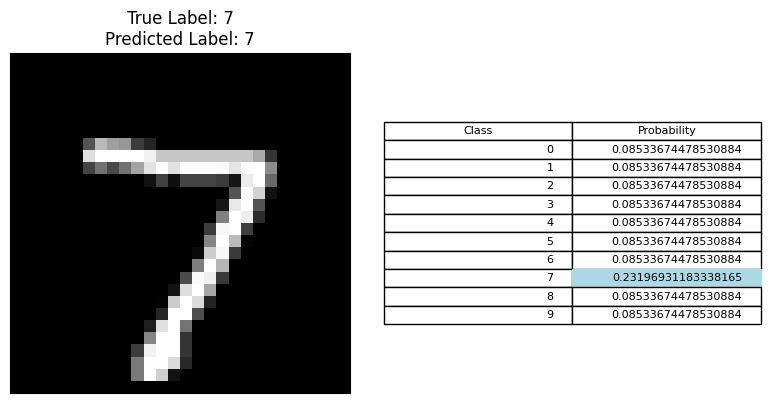

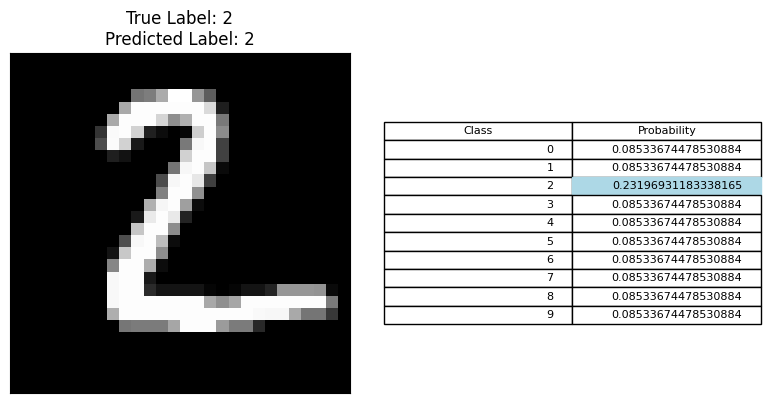

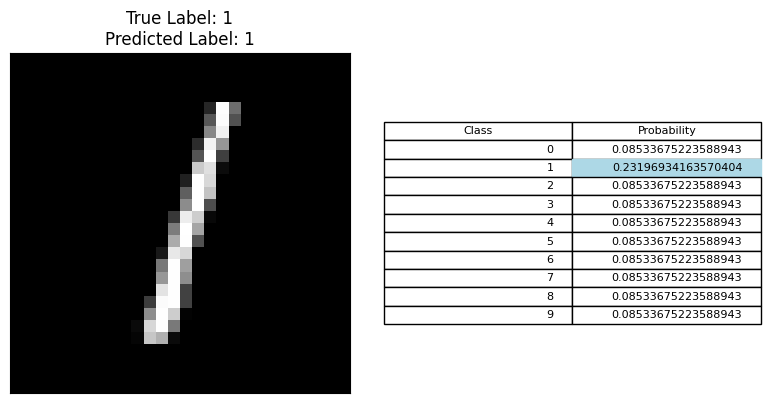

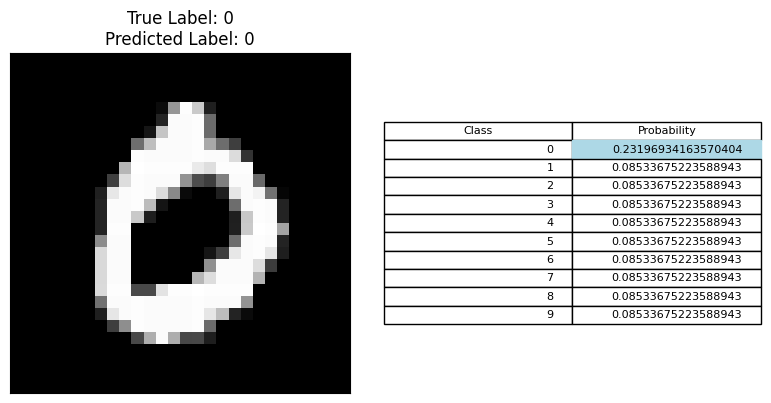

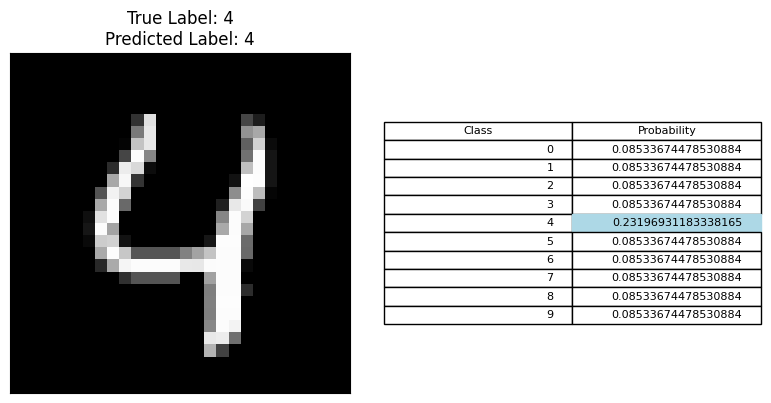

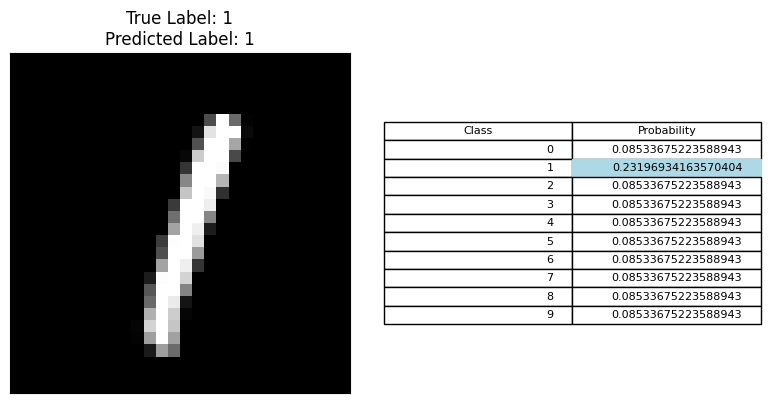

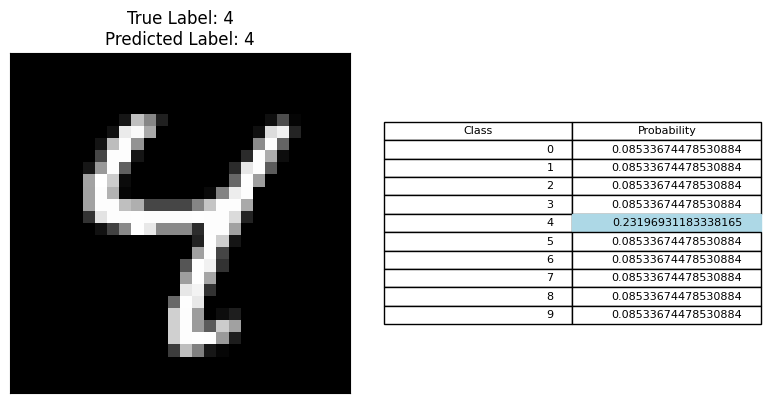

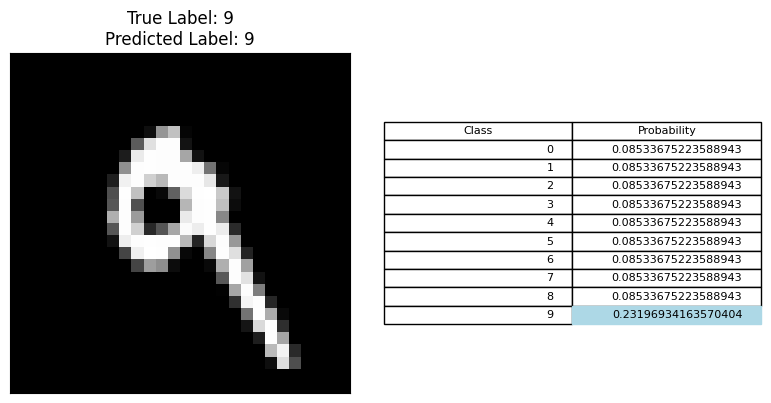

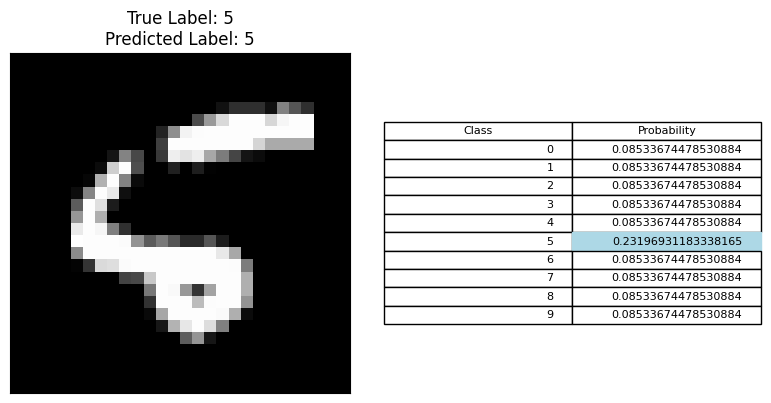

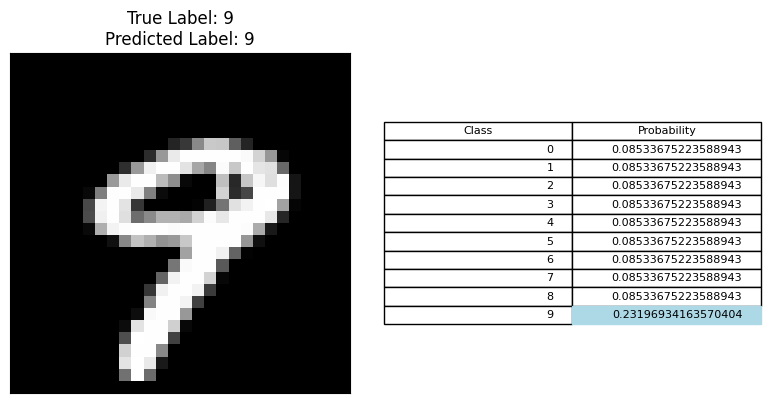

In [80]:
display_correctly_classified(net,testloader,classes)

In [73]:
def display_misclassified(net, testloader, classes, num_samples=10):
    # Set the model to evaluation mode
    net.eval()

    with torch.no_grad():
        misclassified_count = 0
        for i, data in enumerate(testloader, 0):
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            softmax_probs = F.softmax(outputs, dim=1)

            for j in range(len(images)):
                if predicted[j] != labels[j]:
                    misclassified_count += 1
                    # Create a figure with subplots
                    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

                    # Display the image
                    axes[0].imshow(images[j].squeeze(), cmap='gray')
                    axes[0].set_xticks([])
                    axes[0].set_yticks([])
                    axes[0].set_title('True Label: {}\nPredicted Label: {}'.format(classes[labels[j]], classes[predicted[j]]))

                    # Display softmax probabilities in table
                    table_data = [[classes[i], softmax_probs[j][i].item()] for i in range(len(classes))]
                    table = axes[1].table(cellText=table_data, colLabels=['Class', 'Probability'], loc='center')
                    table.auto_set_font_size(False)
                    table.set_fontsize(8)
                    axes[1].axis('off')  # Turn off the axes

                    # Color the maximum probability value in blue
                    max_prob_idx = int(torch.argmax(softmax_probs[j]))
                    max_prob_cell = table[max_prob_idx+1, 1]
                    max_prob_cell.set_color('lightblue')

                    plt.tight_layout()
                    plt.show()
                
                if misclassified_count == num_samples:
                    break
            
            if misclassified_count == num_samples:
                break
                
        if misclassified_count == 0:
            print("No misclassified samples found.")


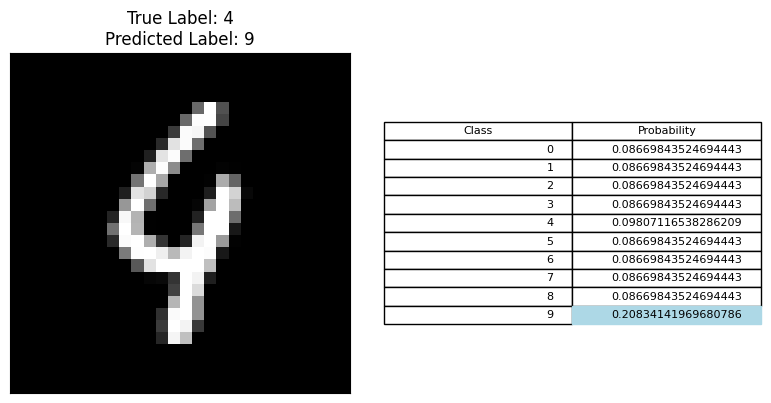

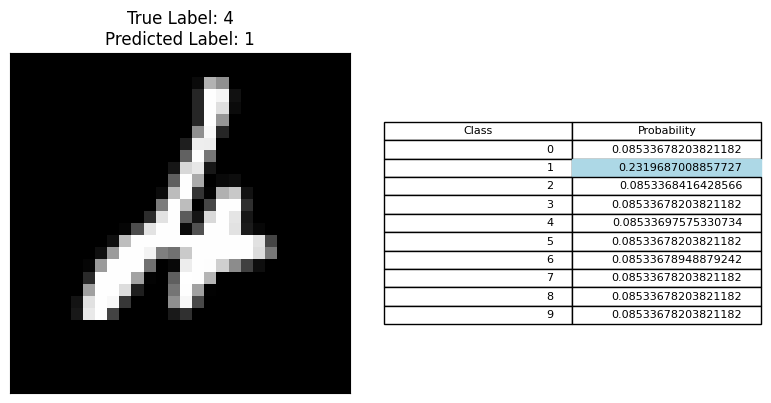

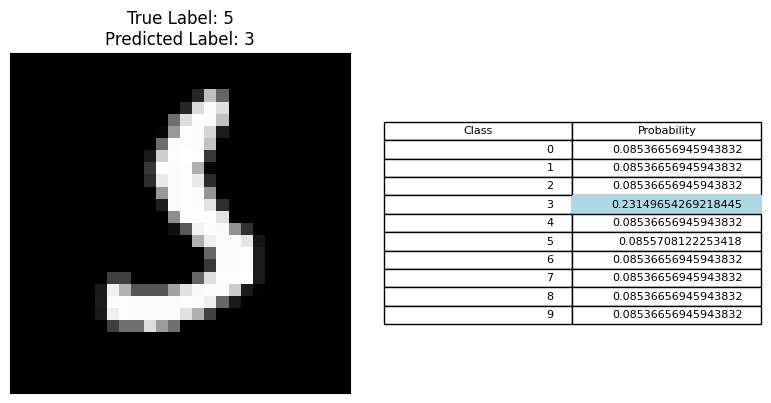

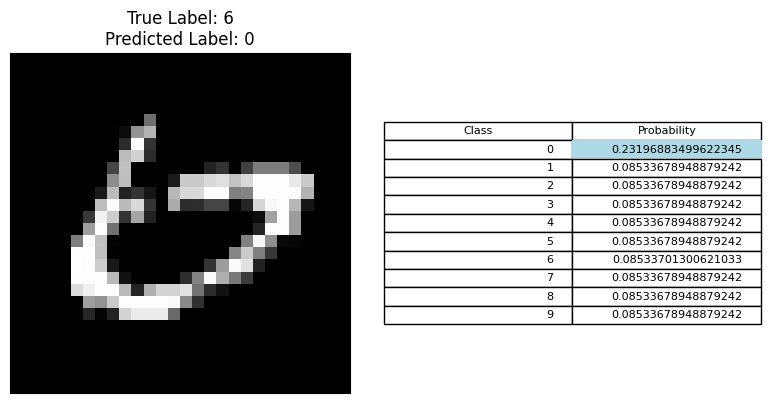

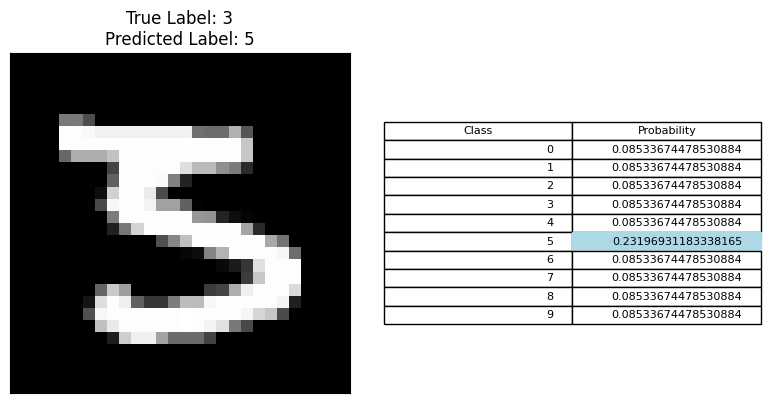

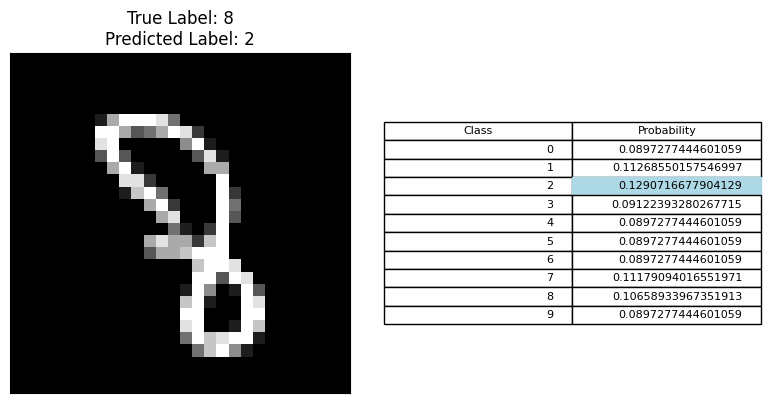

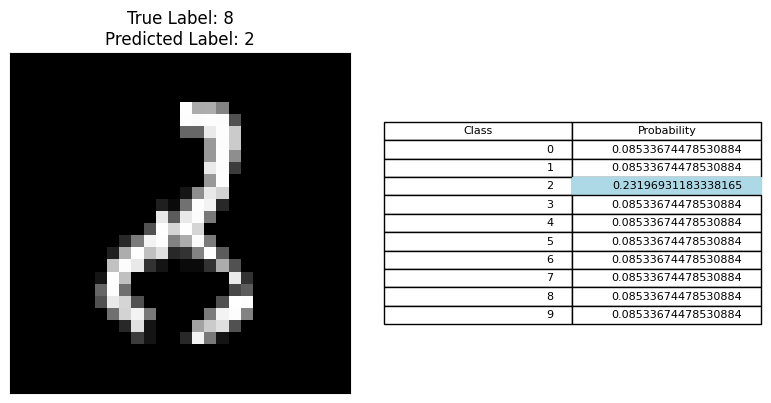

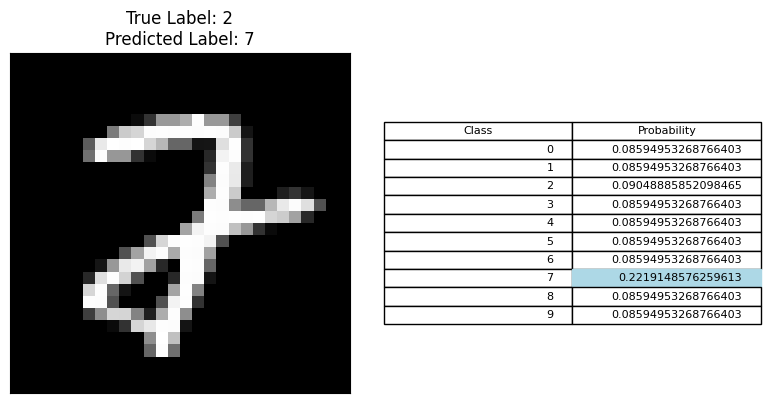

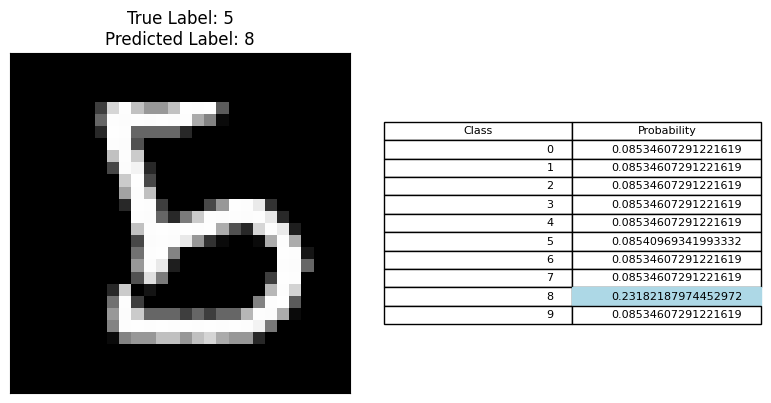

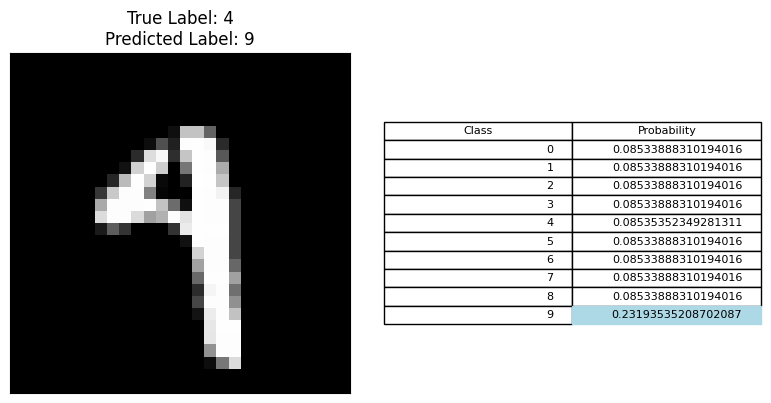

In [74]:
display_misclassified(net, testloader, classes)

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def display_confusion_matrix(net, testloader, classes):
    # Set the model to evaluation mode
    net.eval()

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    # Create confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


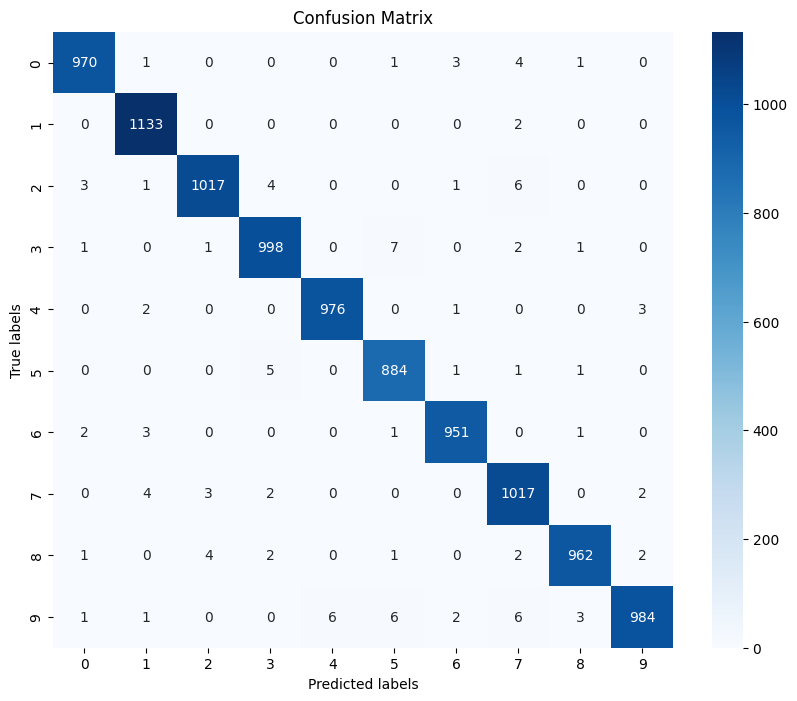

In [86]:
display_confusion_matrix(net, testloader, classes)